<a href="https://colab.research.google.com/github/jacobletsinger/MAT422/blob/main/HW2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2.4

### 2.4.1. MLE for random samples
### 2.4.2. Linear regression

### 2.4.1. MLE for random samples


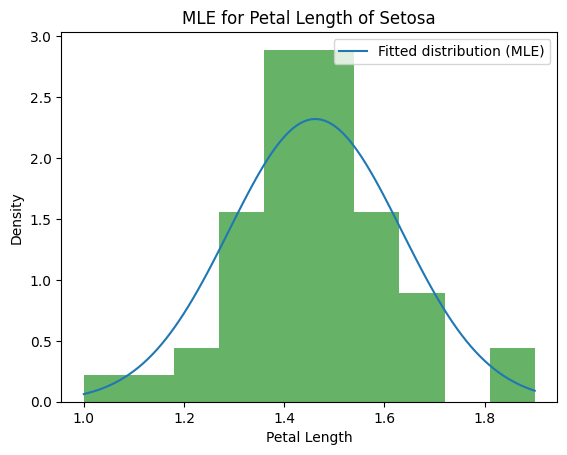

In [6]:
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
data = iris[iris['species'] == 'setosa']['petal_length'].values

def mle(params, data):
    mu, sigma = params
    n = len(data)
    log_likelihood = -n * np.log(2 * np.pi * sigma ** 2) / 2 - np.sum((data - mu) ** 2) / (2 * sigma ** 2)
    return -log_likelihood

initial_params = [0, 1]
result = minimize(mle, initial_params, args=(data,), bounds=[(None, None), (0.001, None)])
mle_mu, mle_sigma = result.x

x = np.linspace(min(data), max(data), 100)
pdf_fitted = (1 / (mle_sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mle_mu) ** 2 / (2 * mle_sigma ** 2))

plt.hist(data, bins=10, density=True, alpha=0.6, color='g')
plt.plot(x, pdf_fitted, label="Fitted distribution (MLE)")
plt.xlabel('Petal Length')
plt.ylabel('Density')
plt.title('MLE for Petal Length of Setosa')
plt.legend()
plt.show()

### 2.4.2. Linear regression

(0.0, 10.0)

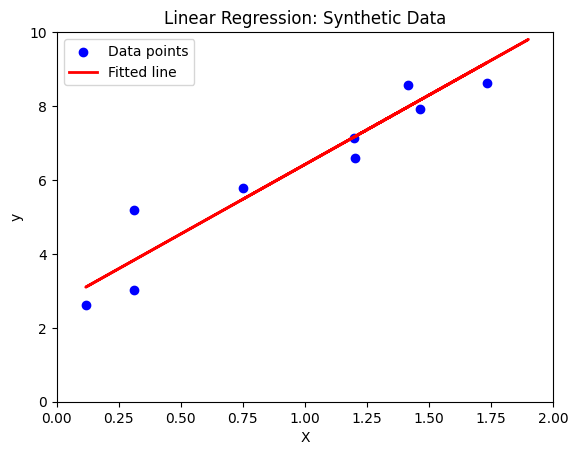

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


np.random.seed(42)
X = 2 * np.random.rand(10, 1)
y = 4 + 3 * X + np.random.randn(10, 1)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Synthetic Data')
plt.legend()
plt.xlim(0, 2)
plt.ylim(0, 10)
